In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | dingle
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | yarkovo
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | nguiu
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | tarudant
City not found. Skipping...
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | umm lajj
Processing Record 15 of Set 1 | mirnyy
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | iaciara
Processing Record 19 of Set 1 | kedrovyy
Processing Record 20 of Set 1

Processing Record 38 of Set 4 | deputatskiy
Processing Record 39 of Set 4 | villa carlos paz
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | nichinan
Processing Record 42 of Set 4 | omboue
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | berbera
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | evensk
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 4 | barmer
Processing Record 50 of Set 4 | turtkul
City not found. Skipping...
Processing Record 1 of Set 5 | jeremie
Processing Record 2 of Set 5 | thinadhoo
Processing Record 3 of Set 5 | puno
Processing Record 4 of Set 5 | russell
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | sampit
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | hobyo
Processing Record 9 of Set 5 | moree
Processing Record 10 of Set 5 | dawson creek
Processi

Processing Record 26 of Set 8 | killybegs
Processing Record 27 of Set 8 | kenai
Processing Record 28 of Set 8 | parsons
Processing Record 29 of Set 8 | segou
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | fernie
Processing Record 32 of Set 8 | watertown
Processing Record 33 of Set 8 | toliary
City not found. Skipping...
Processing Record 34 of Set 8 | sobolevo
Processing Record 35 of Set 8 | rantepao
Processing Record 36 of Set 8 | ahipara
Processing Record 37 of Set 8 | gallup
Processing Record 38 of Set 8 | riyadh
Processing Record 39 of Set 8 | aiquile
Processing Record 40 of Set 8 | goderich
Processing Record 41 of Set 8 | magdalena
Processing Record 42 of Set 8 | mehamn
Processing Record 43 of Set 8 | kovdor
Processing Record 44 of Set 8 | iskateley
Processing Record 45 of Set 8 | ostrovnoy
Processing Record 46 of Set 8 | alofi
Processing Record 47 of Set 8 | rockhampton
Processing Record 48 of Set 8 | osypenko
Processing Record 49 of Set 8 | sredneko

Processing Record 14 of Set 12 | svetlogorsk
Processing Record 15 of Set 12 | hudson bay
Processing Record 16 of Set 12 | port macquarie
Processing Record 17 of Set 12 | safwah
City not found. Skipping...
Processing Record 18 of Set 12 | kitimat
Processing Record 19 of Set 12 | capim grosso
Processing Record 20 of Set 12 | cotonou
Processing Record 21 of Set 12 | maturin
Processing Record 22 of Set 12 | miles city
Processing Record 23 of Set 12 | tourlaville
Processing Record 24 of Set 12 | camapua
Processing Record 25 of Set 12 | san carlos de bariloche
Processing Record 26 of Set 12 | santa clarita
Processing Record 27 of Set 12 | burica
City not found. Skipping...
Processing Record 28 of Set 12 | amapa
Processing Record 29 of Set 12 | carauari
Processing Record 30 of Set 12 | mgandu
Processing Record 31 of Set 12 | tilichiki
Processing Record 32 of Set 12 | bargal
City not found. Skipping...
Processing Record 33 of Set 12 | mandali
Processing Record 34 of Set 12 | port blair
Process

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.45,80,14,17.90,PF,2022-04-18 04:15:16
1,Dingle,10.9995,122.6711,86.65,62,46,13.47,PH,2022-04-18 04:18:38
2,Cape Town,-33.9258,18.4232,59.92,83,92,11.99,ZA,2022-04-18 04:14:33
3,Rikitea,-23.1203,-134.9692,78.46,63,3,8.70,PF,2022-04-18 04:18:38
4,Yarkovo,57.4028,67.0786,39.33,61,62,2.80,RU,2022-04-18 04:18:39
5,Tasiilaq,65.6145,-37.6368,31.64,95,100,8.03,GL,2022-04-18 04:18:39
6,Mataura,-46.1927,168.8643,62.47,54,42,2.19,NZ,2022-04-18 04:18:39
7,Butaritari,3.0707,172.7902,81.75,72,23,11.81,KI,2022-04-18 04:18:40
8,Umm Lajj,25.0213,37.2685,85.30,20,56,8.05,SA,2022-04-18 04:18:40
9,Mirnyy,62.5353,113.9611,35.24,59,94,18.01,RU,2022-04-18 04:18:40


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-04-18 04:15:16,-9.8000,-139.0333,79.45,80,14,17.90
1,Dingle,PH,2022-04-18 04:18:38,10.9995,122.6711,86.65,62,46,13.47
2,Cape Town,ZA,2022-04-18 04:14:33,-33.9258,18.4232,59.92,83,92,11.99
3,Rikitea,PF,2022-04-18 04:18:38,-23.1203,-134.9692,78.46,63,3,8.70
4,Yarkovo,RU,2022-04-18 04:18:39,57.4028,67.0786,39.33,61,62,2.80
5,Tasiilaq,GL,2022-04-18 04:18:39,65.6145,-37.6368,31.64,95,100,8.03
6,Mataura,NZ,2022-04-18 04:18:39,-46.1927,168.8643,62.47,54,42,2.19
7,Butaritari,KI,2022-04-18 04:18:40,3.0707,172.7902,81.75,72,23,11.81
8,Umm Lajj,SA,2022-04-18 04:18:40,25.0213,37.2685,85.30,20,56,8.05
9,Mirnyy,RU,2022-04-18 04:18:40,62.5353,113.9611,35.24,59,94,18.01


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

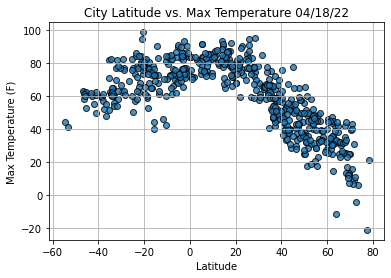

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

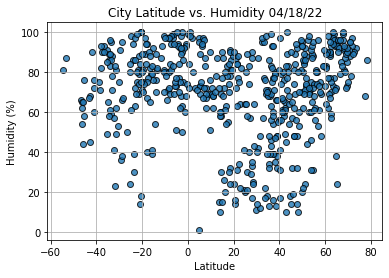

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

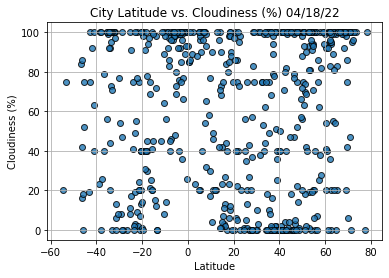

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

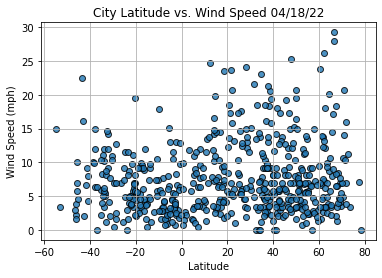

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Kedrovyy
Country                        RU
Date          2022-04-18 04:18:41
Lat                       56.1667
Lng                       91.8167
Max Temp                    48.61
Humidity                       81
Cloudiness                    100
Wind Speed                    9.1
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Dingle,PH,2022-04-18 04:18:38,10.9995,122.6711,86.65,62,46,13.47
4,Yarkovo,RU,2022-04-18 04:18:39,57.4028,67.0786,39.33,61,62,2.80
5,Tasiilaq,GL,2022-04-18 04:18:39,65.6145,-37.6368,31.64,95,100,8.03
7,Butaritari,KI,2022-04-18 04:18:40,3.0707,172.7902,81.75,72,23,11.81
8,Umm Lajj,SA,2022-04-18 04:18:40,25.0213,37.2685,85.30,20,56,8.05


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

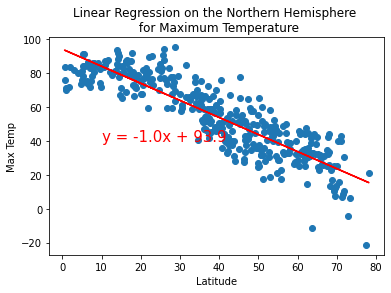

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

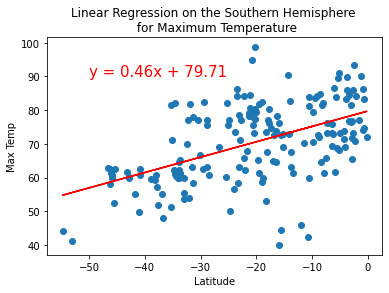

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

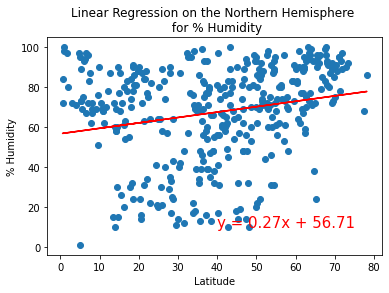

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

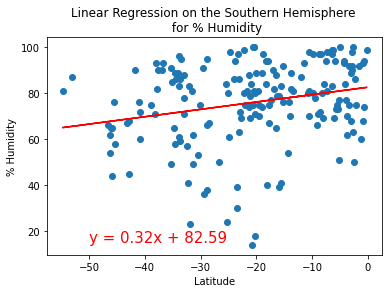

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

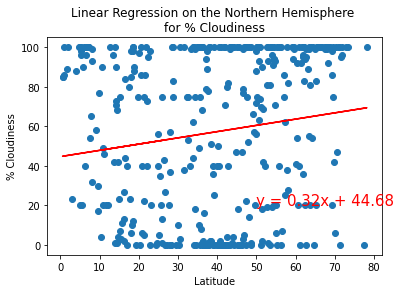

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,20))

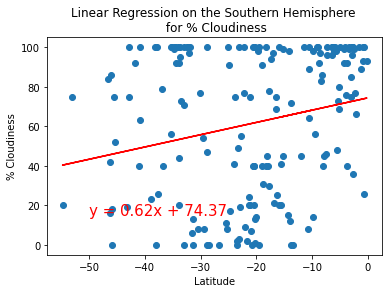

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

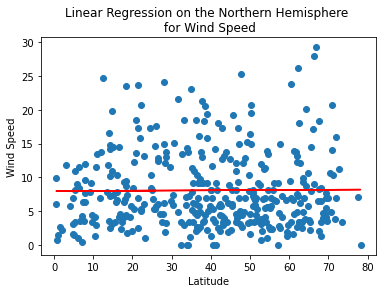

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

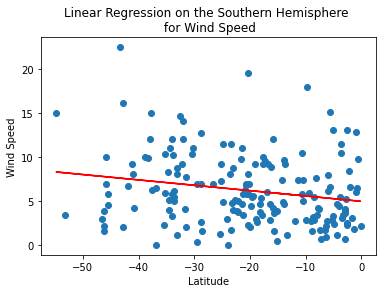

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))